# Samantha Louise Samoy
### 2ECE-C

In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv('spotify-2023.csv')

In [9]:
rows, columns = df.shape
print(f"The dataset contains {rows} rows and {columns} columns.")

The dataset contains 953 rows and 24 columns.


In [11]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [15]:
print(df.head())
print(df.columns)

                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703               

In [19]:
# Ensure the 'streams' column is numeric, coercing any errors to NaN
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Check for missing values in 'streams' and handle them (optional)
# For example, drop rows with NaN values in the 'streams' column:
df = df.dropna(subset=['streams'])

# Summary statistics for the 'streams' column
streams_desc = df['streams'].describe()

# Median of streams
median_streams = df['streams'].median()

# Standard deviation of streams
std_streams = df['streams'].std()

# Display the results
print("Summary Statistics:")
print(streams_desc)
print("\nMedian of Streams:", median_streams)
print("Standard Deviation of Streams:", std_streams)

Summary Statistics:
count    9.520000e+02
mean     5.141374e+08
std      5.668569e+08
min      2.762000e+03
25%      1.416362e+08
50%      2.905309e+08
75%      6.738690e+08
max      3.703895e+09
Name: streams, dtype: float64

Median of Streams: 290530915.0
Standard Deviation of Streams: 566856949.0388832


In [21]:
print(df['released_year'].describe())
print(df['artist_count'].describe())

count     952.000000
mean     2018.288866
std        11.011397
min      1930.000000
25%      2020.000000
50%      2022.000000
75%      2022.000000
max      2023.000000
Name: released_year, dtype: float64
count    952.000000
mean       1.556723
std        0.893331
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        8.000000
Name: artist_count, dtype: float64


In [77]:
# Find the top 5 streamed tracks
top_streamed_tracks = df.nlargest(5, 'streams')

# Select relevant columns and convert to DataFrame
top_streamed_tracks_df = top_streamed_tracks[['track_name', 'streams']]

print(top_streamed_tracks_df)

                                        track_name       streams
55                                 Blinding Lights  3.703895e+09
179                                   Shape of You  3.562544e+09
86                               Someone You Loved  2.887242e+09
620                                   Dance Monkey  2.864792e+09
41   Sunflower - Spider-Man: Into the Spider-Verse  2.808097e+09


         Artist  Track Count
0  Taylor Swift           34
1    The Weeknd           22
2     Bad Bunny           19
3           SZA           19
4  Harry Styles           17


<Axes: title={'center': 'Number of Tracks Released Per Year'}, xlabel='released_year'>

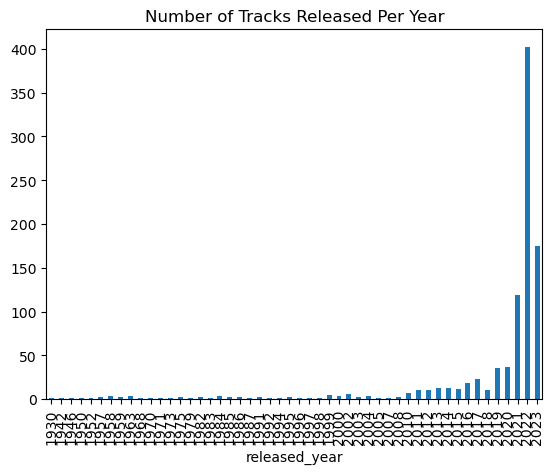

In [70]:
tracks_per_year = df['released_year'].value_counts().sort_index()
tracks_per_year.plot(kind='bar', title='Number of Tracks Released Per Year')

<Axes: title={'center': 'Number of Tracks Released Per Month'}, xlabel='released_month'>

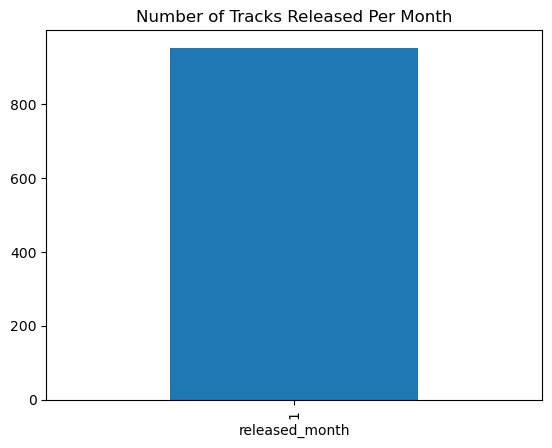

In [35]:
df['released_month'] = pd.to_datetime(df['released_month']).dt.month
tracks_per_month = df['released_month'].value_counts().sort_index()
tracks_per_month.plot(kind='bar', title='Number of Tracks Released Per Month')

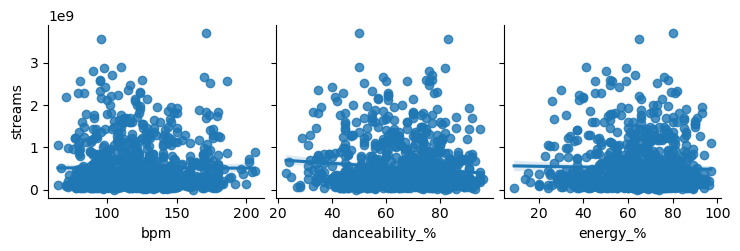

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

attributes = ['bpm', 'danceability_%', 'energy_%']
sns.pairplot(df, x_vars=attributes, y_vars='streams', kind='reg')
plt.show()

In [67]:
# Calculate correlation between danceability_% and energy_%
danceability_energy_corr = df[['danceability_%', 'energy_%']].corr()

# Convert it to a DataFrame for row and column format
danceability_energy_corr_df = danceability_energy_corr.reset_index()

# Calculate correlation between valence_% and acousticness_%
valence_acousticness_corr = df[['valence_%', 'acousticness_%']].corr()

# Convert it to a DataFrame for row and column format
valence_acousticness_corr_df = valence_acousticness_corr.reset_index()

print(danceability_energy_corr_df)
print(valence_acousticness_corr_df)

            index  danceability_%  energy_%
0  danceability_%        1.000000  0.198485
1        energy_%        0.198485  1.000000
            index  valence_%  acousticness_%
0       valence_%   1.000000       -0.081161
1  acousticness_%  -0.081161        1.000000


<Axes: title={'center': 'Tracks in Different Platforms'}>

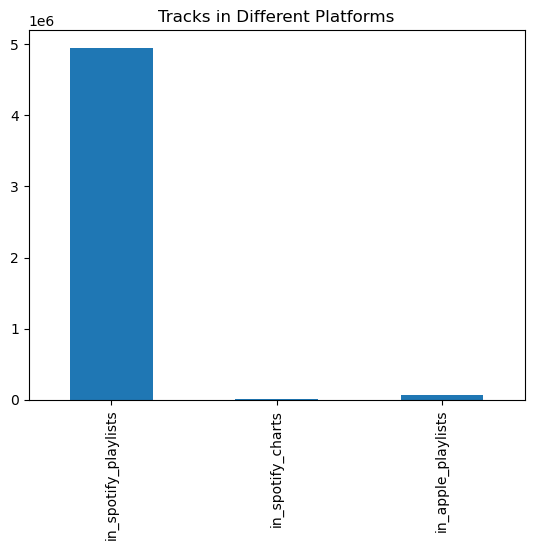

In [47]:
platform_counts = df[['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists']].sum()
platform_counts.plot(kind='bar', title='Tracks in Different Platforms')

In [49]:
key_mode_patterns = df.groupby(['key', 'mode']).agg({'streams': 'mean'}).reset_index()
print(key_mode_patterns)

   key   mode       streams
0    A  Major  4.019603e+08
1    A  Minor  4.173906e+08
2   A#  Major  6.275336e+08
3   A#  Minor  4.849231e+08
4    B  Major  4.363336e+08
5    B  Minor  5.825110e+08
6   C#  Major  6.285883e+08
7   C#  Minor  5.665252e+08
8    D  Major  5.720180e+08
9    D  Minor  3.425588e+08
10  D#  Major  6.819623e+08
11  D#  Minor  4.793647e+08
12   E  Major  7.605963e+08
13   E  Minor  5.083264e+08
14   F  Major  5.279311e+08
15   F  Minor  4.102836e+08
16  F#  Major  4.175450e+08
17  F#  Minor  5.954921e+08
18   G  Major  4.929813e+08
19   G  Minor  3.637593e+08
20  G#  Major  5.458044e+08
21  G#  Minor  3.219036e+08


In [65]:
# Find the top 5 frequent artists
frequent_artists = df['artist(s)_name'].value_counts().head(5)

# Convert it to a DataFrame for row and column format
frequent_artists_df = pd.DataFrame({
    'Artist': frequent_artists.index,
    'Track Count': frequent_artists.values
})

print(frequent_artists_df)

         Artist  Track Count
0  Taylor Swift           34
1    The Weeknd           22
2     Bad Bunny           19
3           SZA           19
4  Harry Styles           17
